## TEST KERAS

Ce notebook vous permet de tester si keras et tensorflow fonctionne chez vous sur un cas très simple

In [5]:
# import
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [6]:
# Loading MNIST Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train/255.0
X_test = X_test/255.0


(60000, 28, 28)


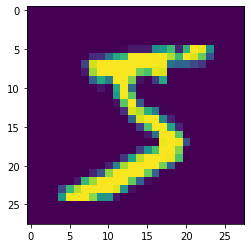

In [7]:
print(X_train.shape)
plt.imshow(X_train[0,:,:])

In [8]:
# Test Perceptron


# "shape" de l'entrée
size_im = 784

# On définit une couche d'entrée de taille 784
input_img = Input(shape=(size_im,))
# On définit une couche de sortie de taille 10, on utilise l'activation softmax
output = Dense(10, activation='softmax')(input_img)

# On assemble le modèle
perceptron = Model(input_img, output)
perceptron.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [9]:
# On implémente le modèle, en précisant qu'on fait du gradient stochastique et qu'on veut classifier en utilisant la bonne fonction de loss
perceptron.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=["accuracy"])

In [10]:
# On comment l'entrainement. On entraine sur X_train et y_train correctement redimensionner. On test sur X_test et y_testS
perceptron.fit(X_train.reshape(-1,784), tf.keras.utils.to_categorical(y_train),
                epochs=20,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test.reshape(-1,784), tf.keras.utils.to_categorical(y_test)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 49us/sample - loss: 1.0177 - acc: 0.7646 - val_loss: 0.6103 - val_acc: 0.8607
Epoch 2/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.5575 - acc: 0.8645 - val_loss: 0.4813 - val_acc: 0.8804
Epoch 3/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4750 - acc: 0.8787 - val_loss: 0.4289 - val_acc: 0.8886
Epoch 4/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4351 - acc: 0.8859 - val_loss: 0.3994 - val_acc: 0.8961
Epoch 5/20
60000/60000 [==============================] - 3s 48us/sample - loss: 0.4107 - acc: 0.8906 - val_loss: 0.3800 - val_acc: 0.9005
Epoch 6/20
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3935 - acc: 0.8935 - val_loss: 0.3666 - val_acc: 0.9021
Epoch 7/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3806 - acc: 0.8966 - val_loss: 0.